# Visualização de Resultados

O Jupyter **Comparacao-Prob-Deteccao-Com-E-Sem-ML** pega os datasets e compara vários esquemas de classificação:

1) Random Forest com 10 árvores

2) Decision Tree

3) Perceptron

4) SVM com SGD

5) Algoritmo determinístico do Hassan (E>eta)

6) Algoritmo determinístico do Kapetanovic (a1 e a2)

Ao final, aquele Jupyter salva tudo num JSON. A ideia do Jupyter atual é ler esse JSON e plotar os resultados.

In [1]:
# IMPORTS
import json
import numpy as np
import matplotlib.pyplot as plt

#DEFININDO ALGUNS PARÂMETROS DO GRÁFICO
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {
    'figure.figsize': [12, 3.3], 
    'axes.labelsize': 12,
    'axes.titlesize':14, 
    'font.size': 12,
    'legend.fontsize': 10, 
    'xtick.labelsize': 10, 
    'ytick.labelsize': 10,
    'axes.axisbelow': True
}
plt.rcParams.update(params)

In [2]:
def printarResultado(arraytempoClassificarCadaAmostra, matrizProbabilidadeDeteccao, matrizConfusao, rangePotEspiao, rangeSNRs, qtdUsuarios, qtdAntenas, qtdSimbolos, descricao, acuracia, precisao, revocacao):
    
    # MONTANDO O TITULO DA FIGURA
    titulo  = descricao + "\n"
    titulo += "Usuários: " + str(qtdUsuarios) + " - Antenas: " + str(qtdAntenas) + " - Símbolos: " + str(qtdSimbolos) + "\n"
    titulo += "Acurácia: " + str(acuracia)[:7] + " - Precisão: " + str(precisao)[:7] + " - Revocação: " + str(revocacao)[:7] + "\n"
    titulo += "Tempo de classificação por amostra (s):" + str(np.mean(arraytempoClassificarCadaAmostra)) + " +- " + str(np.std(arraytempoClassificarCadaAmostra)) + "\n"
    
    # CRIANDO O PRIMEIRO GRAFICO
    fig, axs = plt.subplots(1, 2)
    for i in range(len(rangePotEspiao)):
        axs[0].plot(rangeSNRs, matrizProbabilidadeDeteccao[i], label="Potência do Espião: "+str(rangePotEspiao[i]))
    axs[0].set_xlabel("SNR")
    axs[0].set_ylabel("Probabilidade de Detecção")
    axs[0].grid(alpha=0.5)
    axs[0].legend()
    
    # CRIANDO A MATRIZ DE CONFUSAO
    axs[1].imshow(matrizConfusao, cmap="gray")
    for (j,i), total in np.ndenumerate(matrizConfusao):
        axs[1].text(i, j, int(total), ha="center", va="center", color="#e6005c", size=15)
    axs[1].set_xlabel("Predito")
    axs[1].set_ylabel("Real")
    axs[1].set_xticklabels([])
    axs[1].set_yticklabels([])
    
    # PRINTANDO
    plt.suptitle(titulo, y=1.20)
    plt.show()

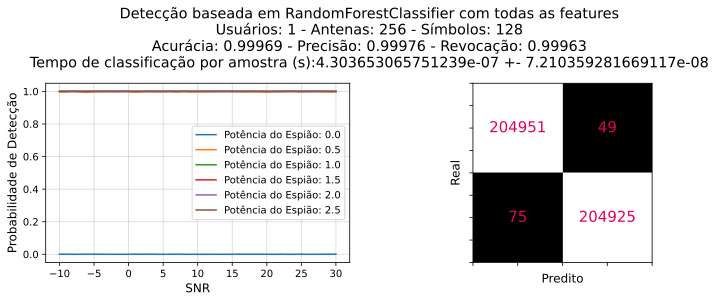

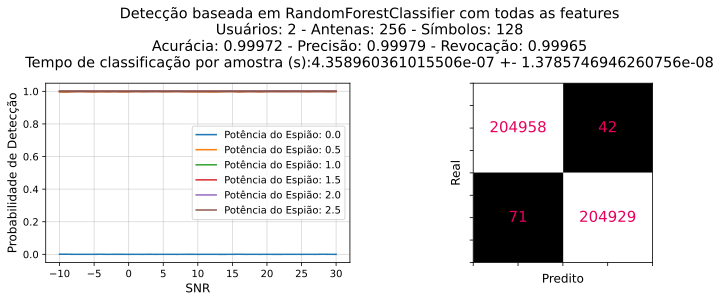

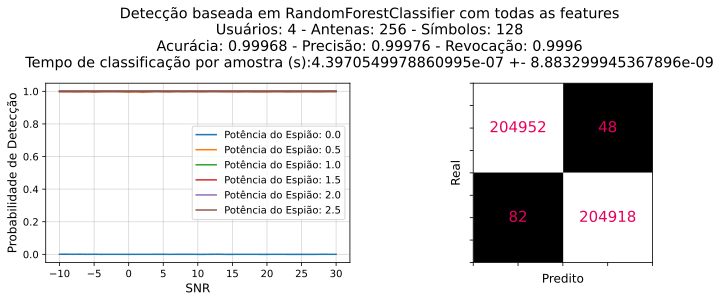

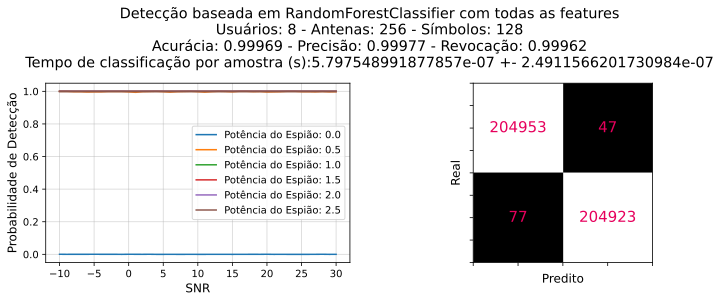

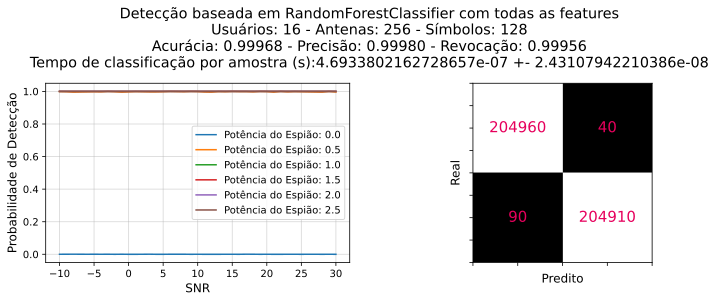

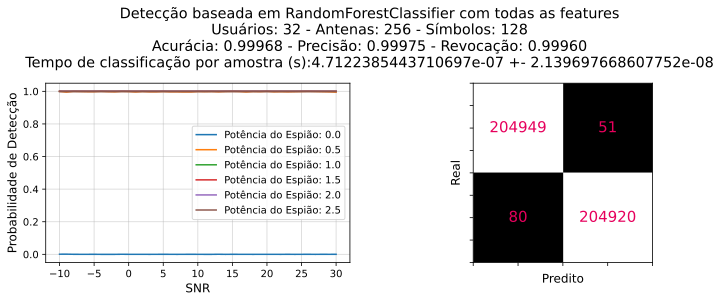

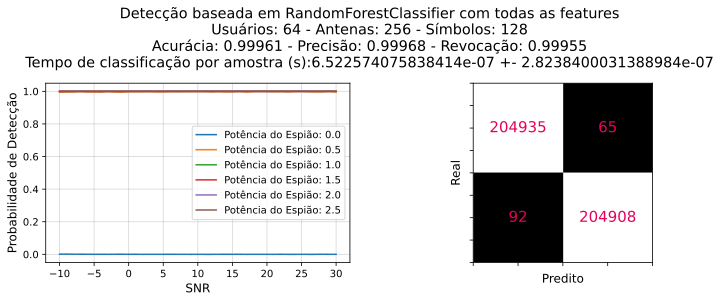

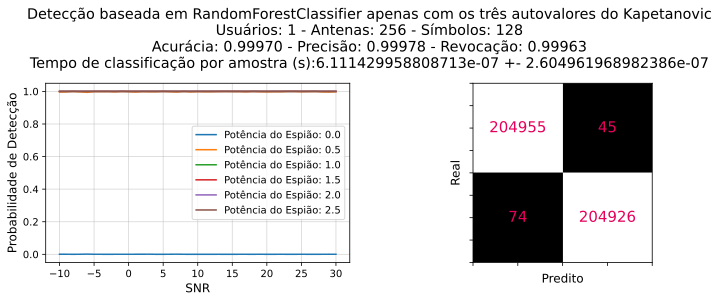

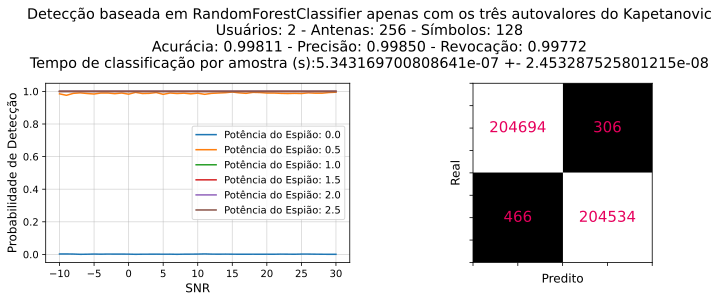

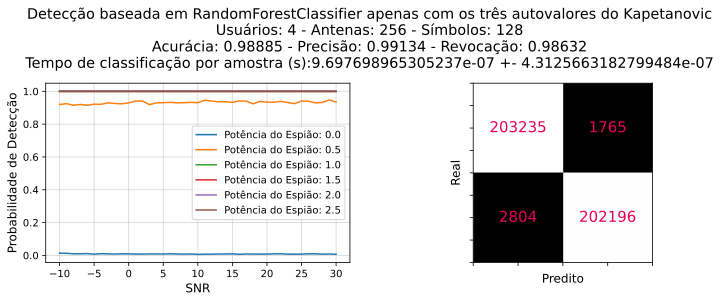

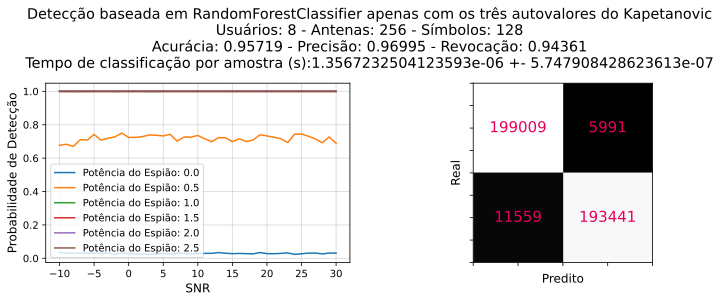

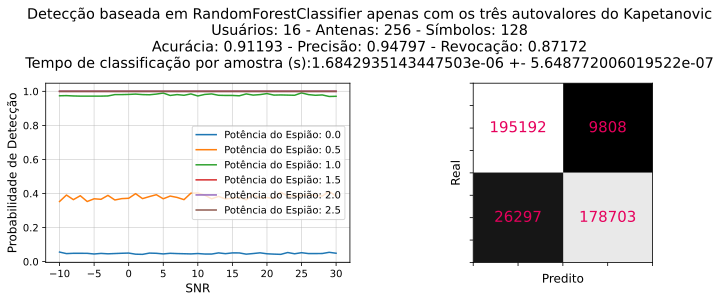

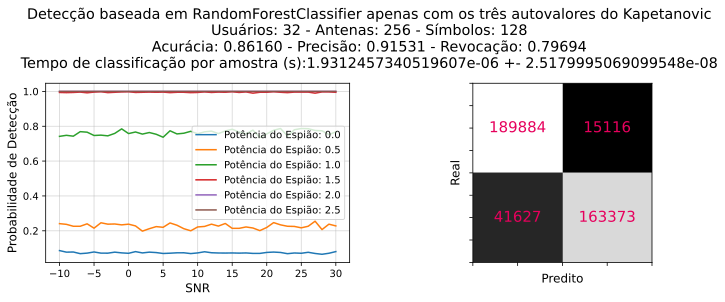

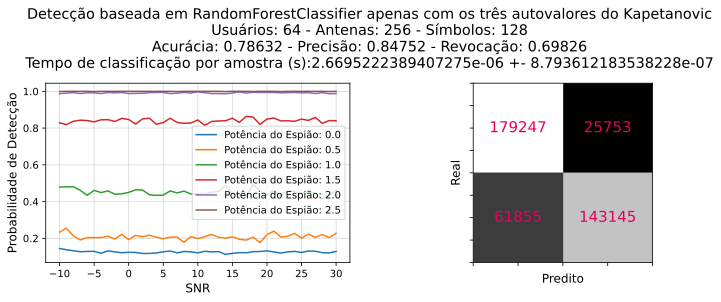

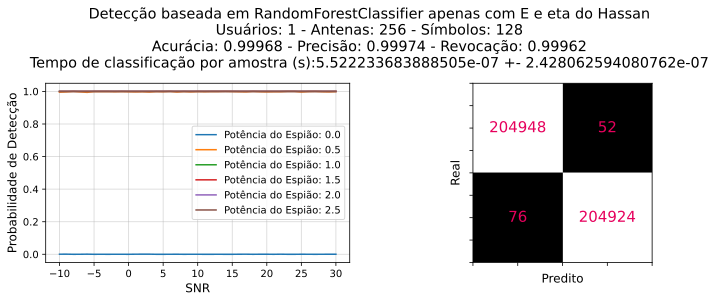

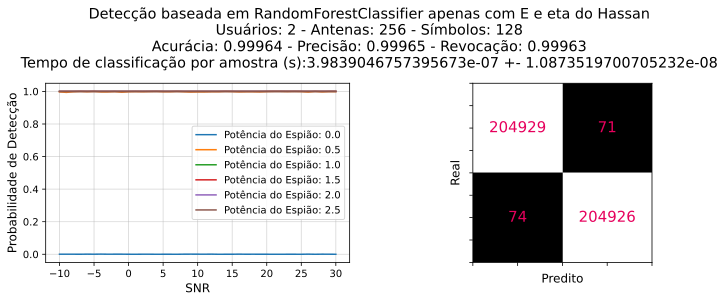

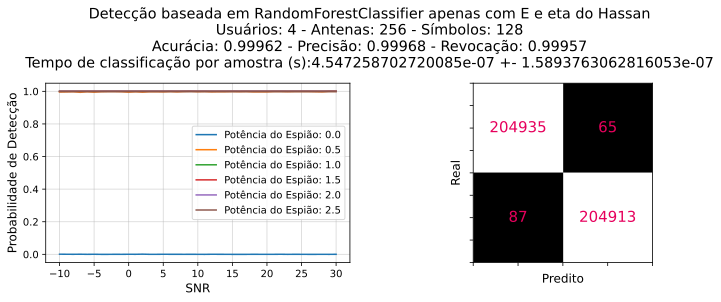

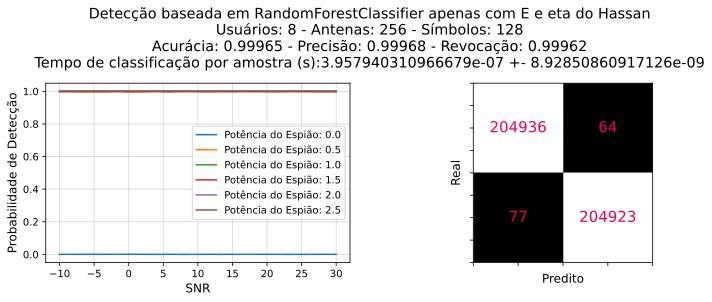

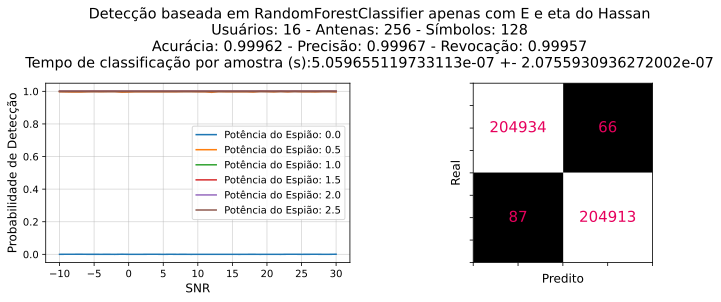

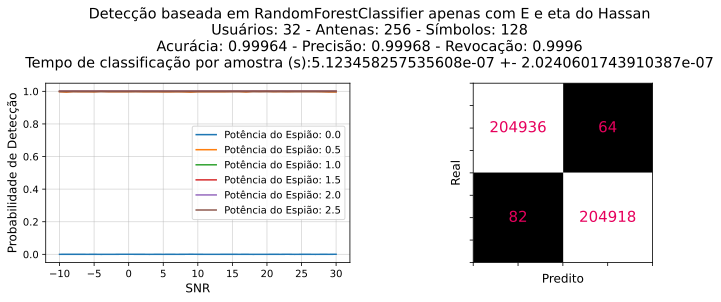

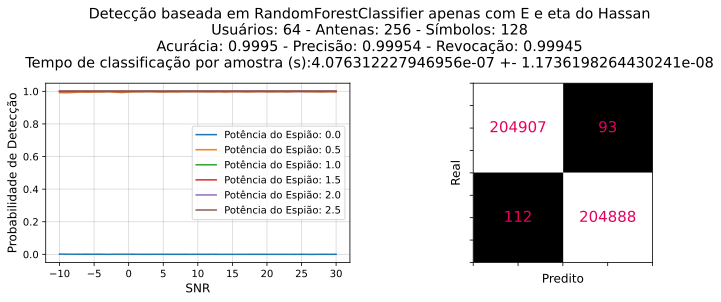

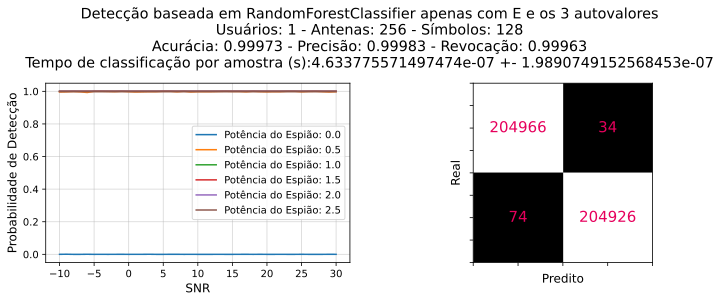

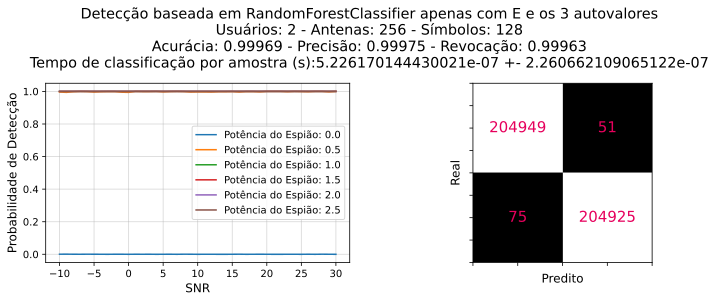

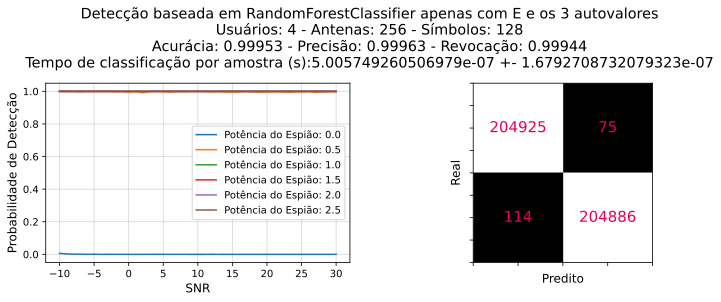

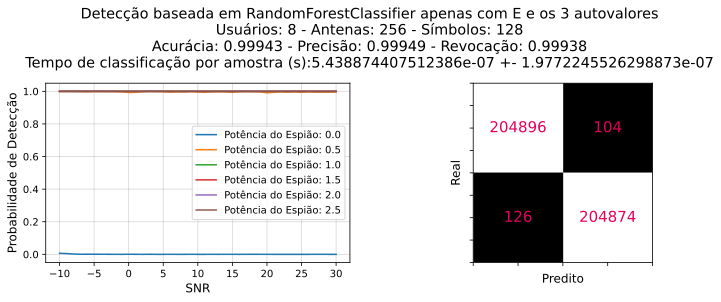

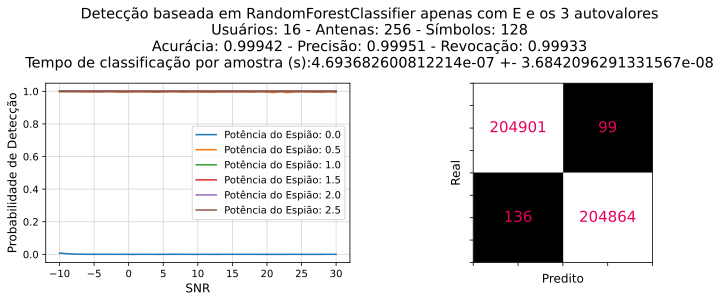

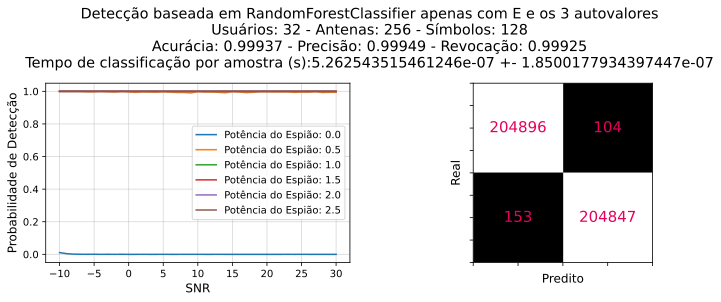

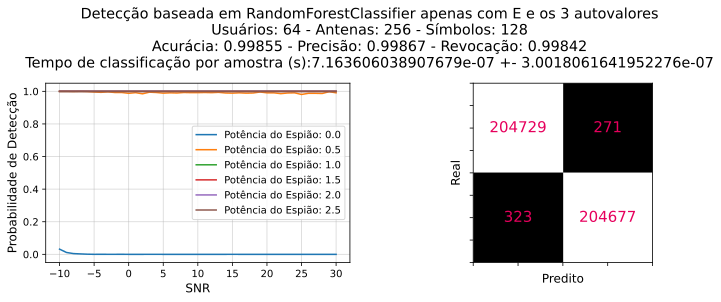

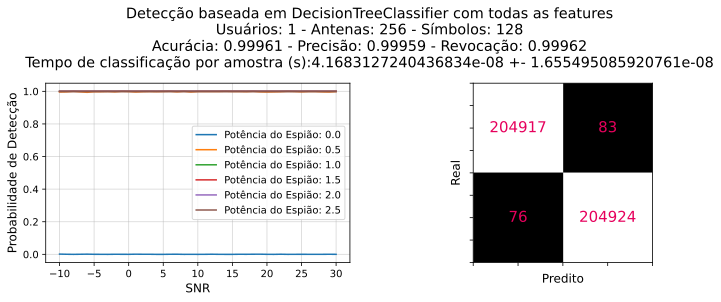

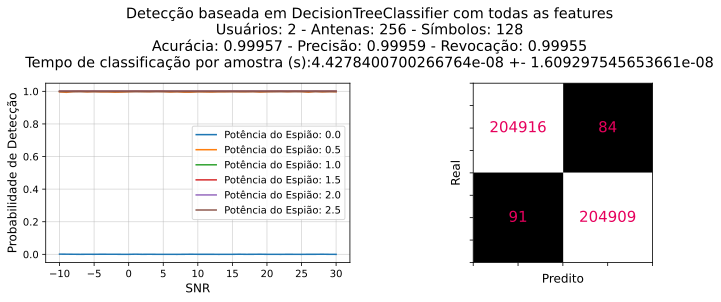

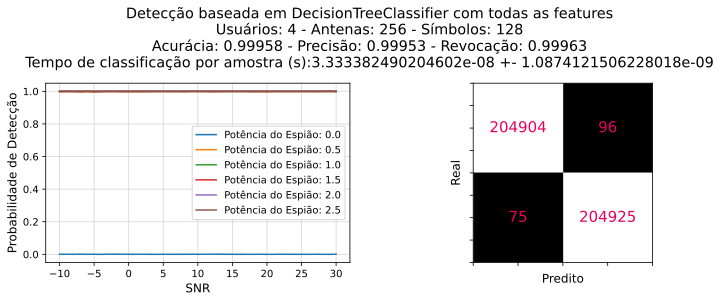

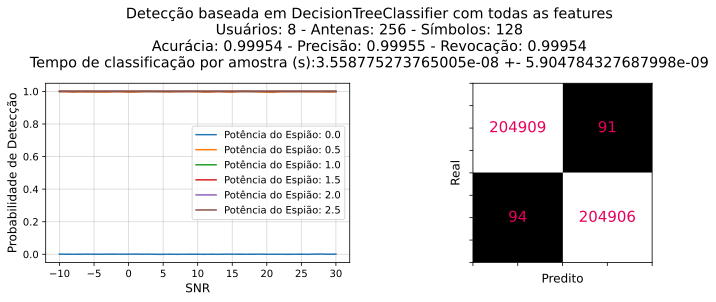

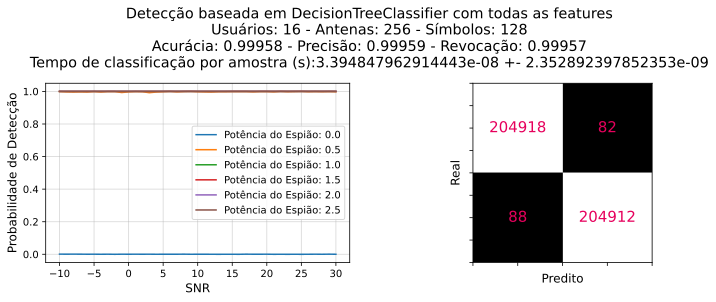

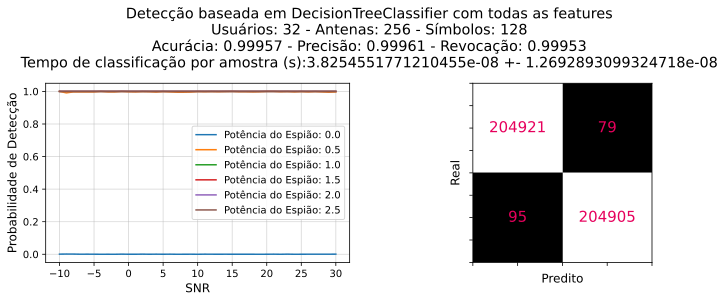

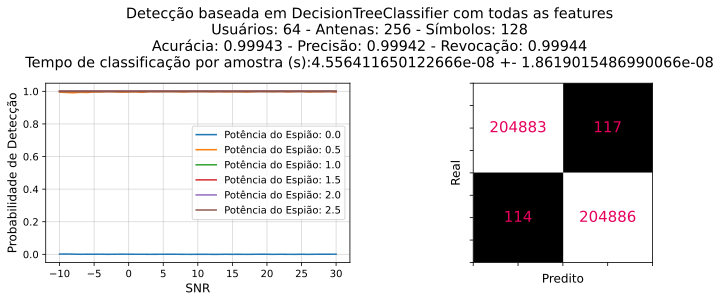

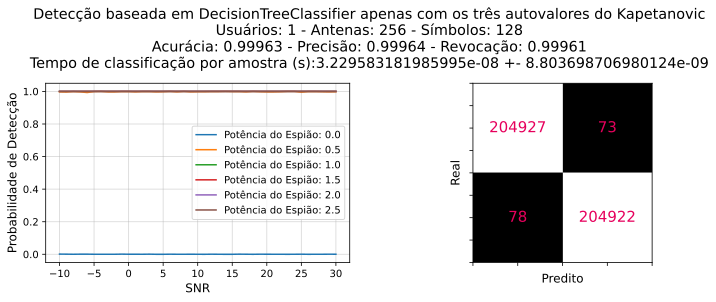

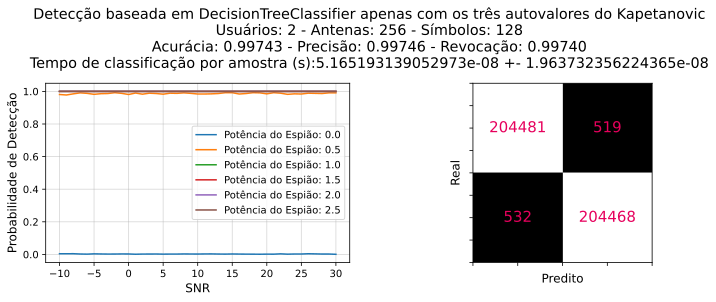

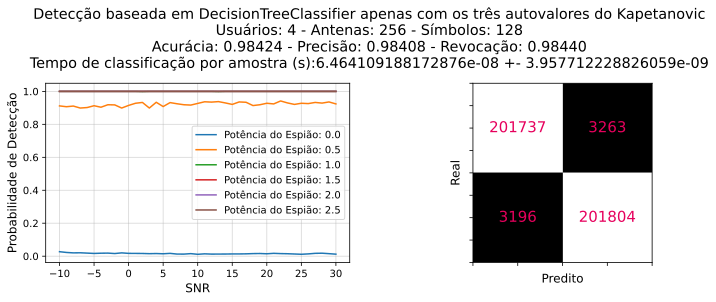

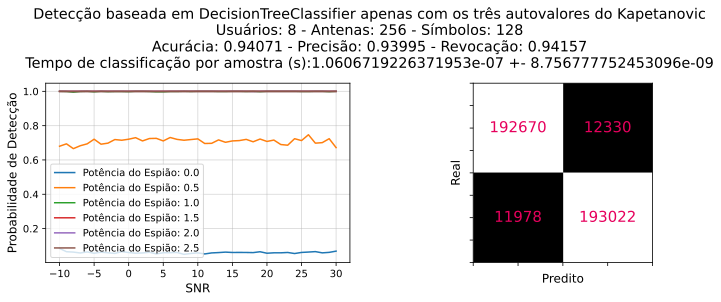

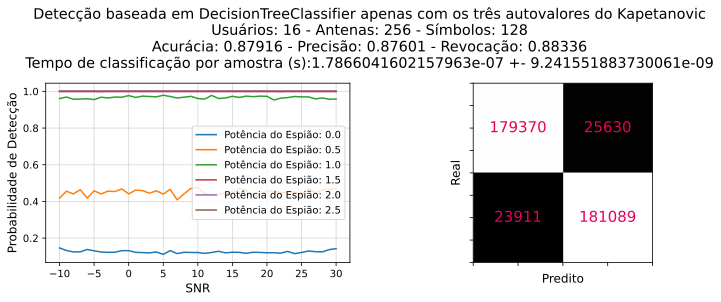

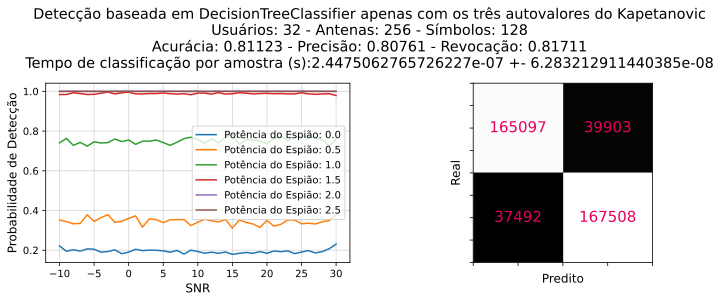

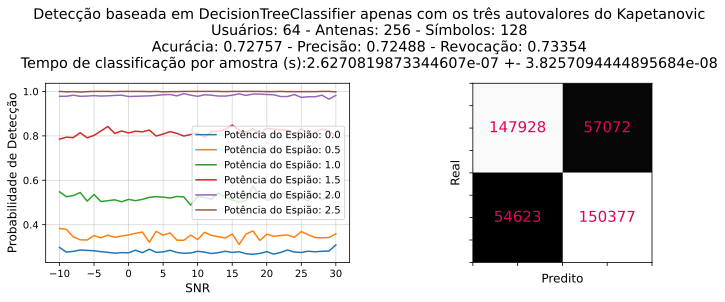

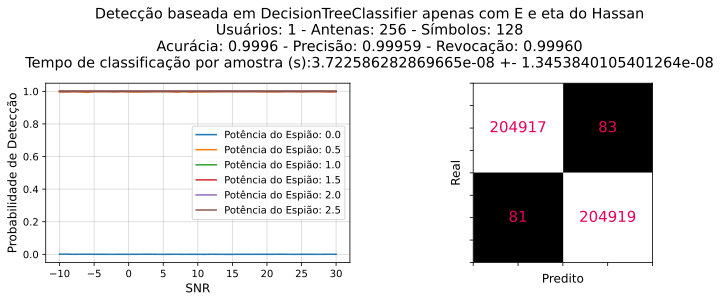

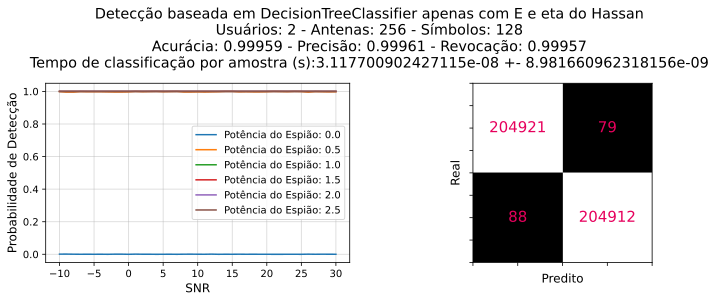

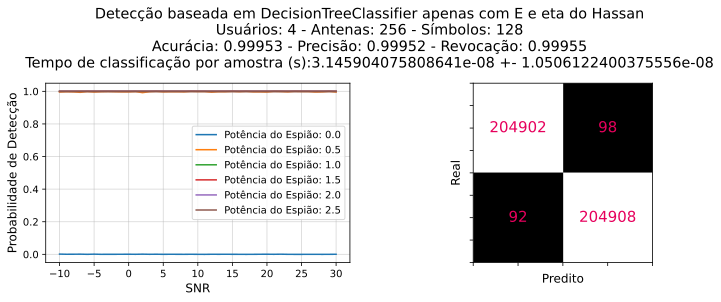

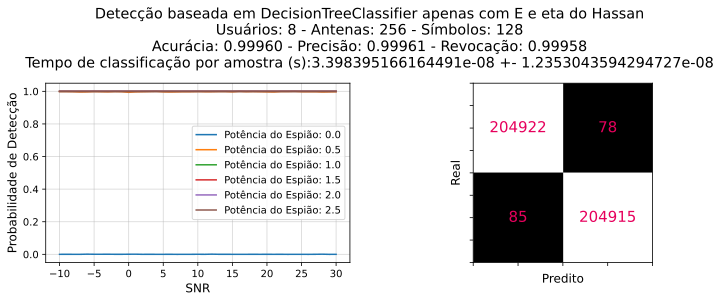

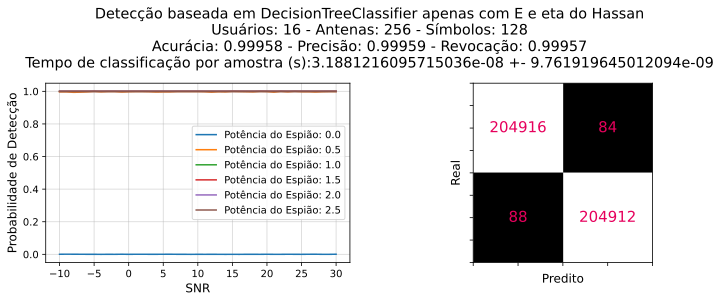

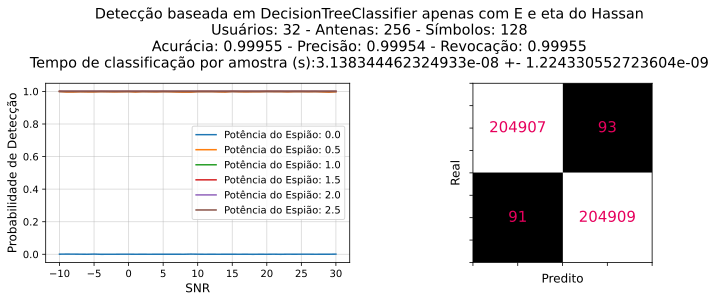

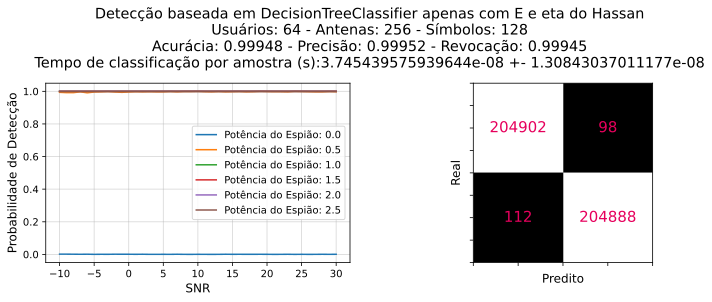

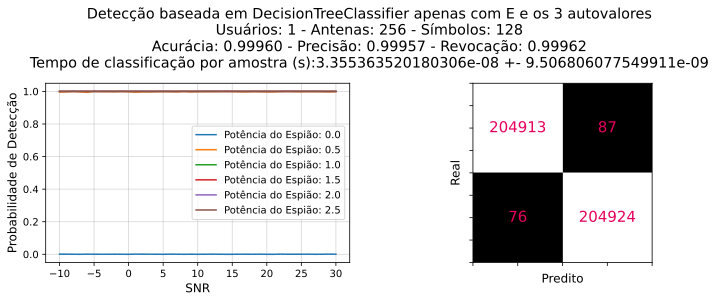

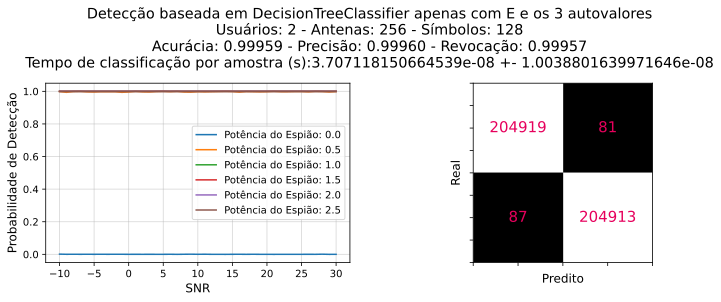

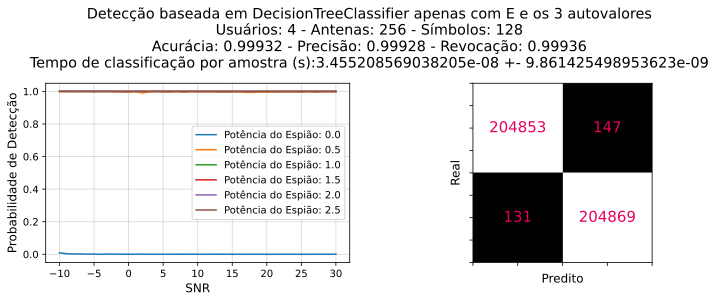

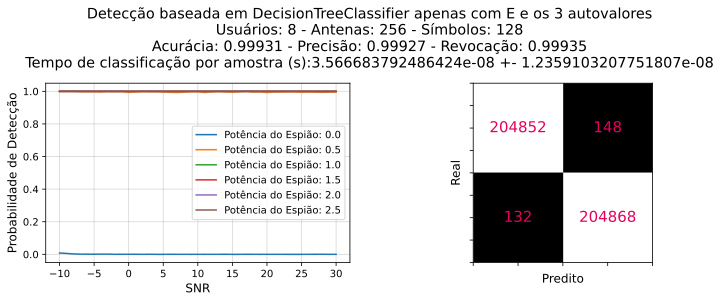

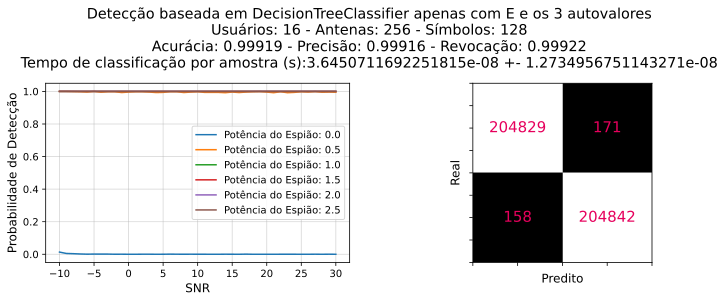

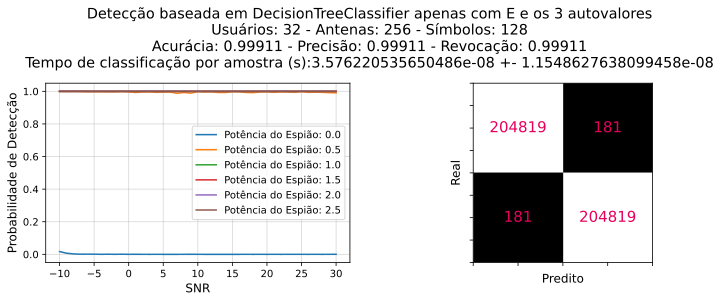

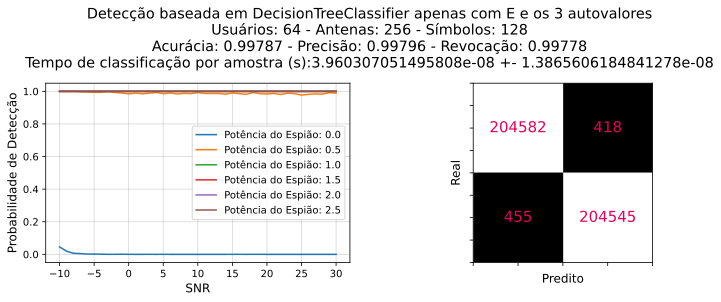

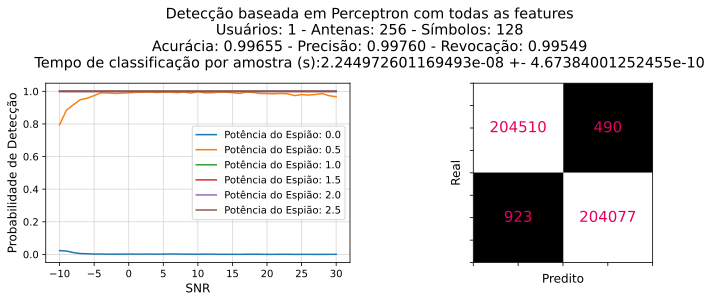

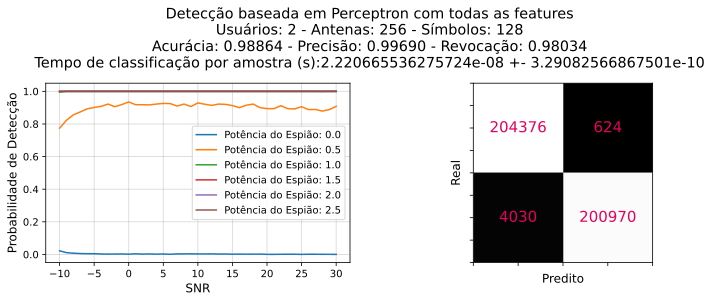

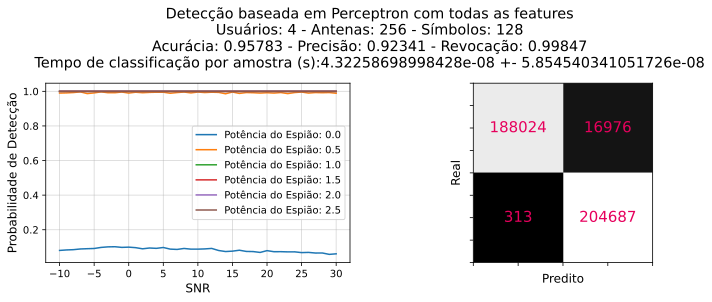

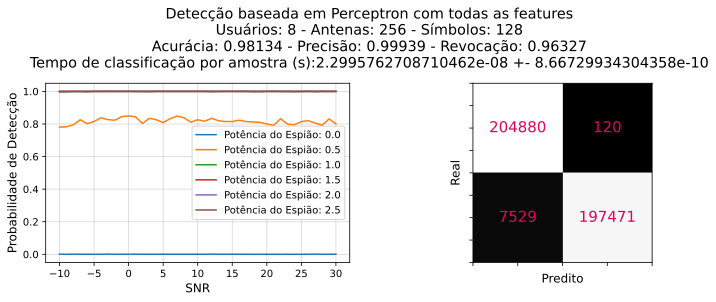

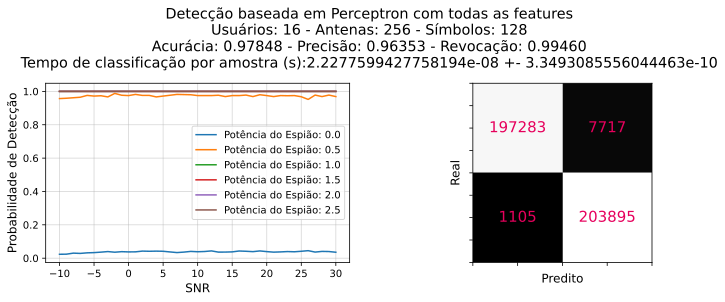

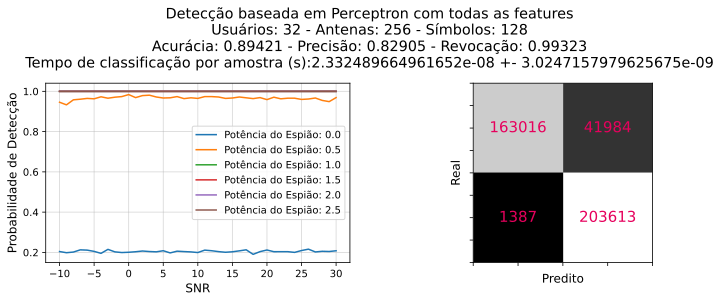

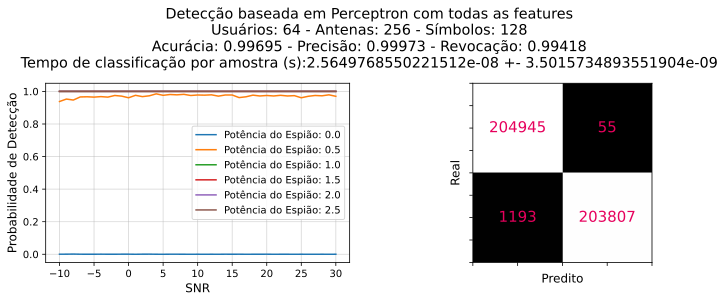

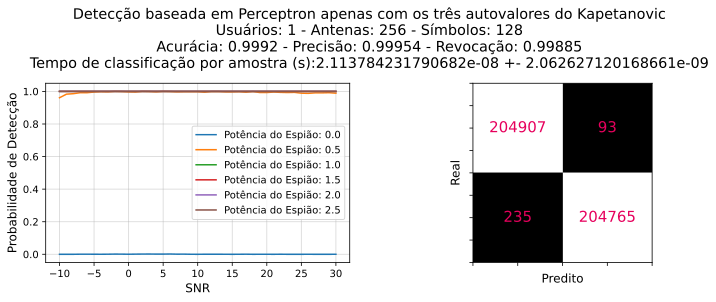

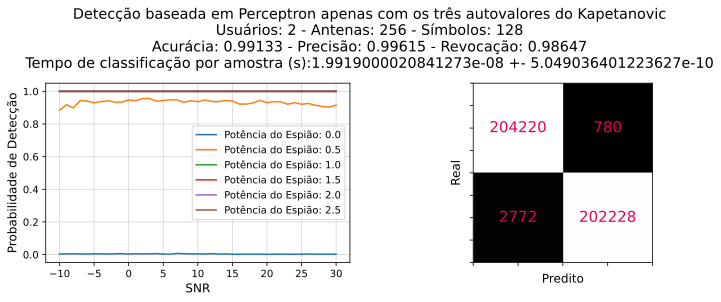

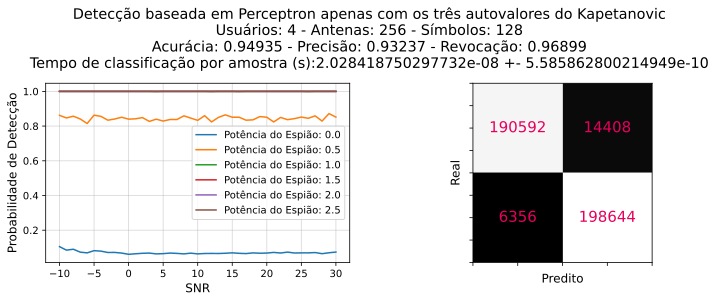

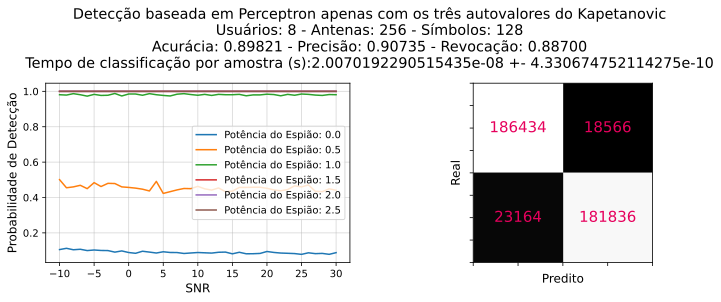

In [ ]:
with open("../Resultados/probabilidadeDeteccao_1611521210.5679884.json") as arquivoJSON:
    objJSON = json.load(arquivoJSON)
    for item in objJSON:
        arraytempoClassificarCadaAmostra = eval(item["arraytempoClassificarCadaAmostra"])
        matrizProbabilidadeDeteccao      = eval(item["matrizProbabilidadeDeteccao"].replace(",,",","))
        matrizConfusao                   = eval(item["matrizConfusao"].replace(",,",","))
        rangePotEspiao                   = eval(item["rangePotEspiao"].replace(",,",","))
        rangeSNRs                        = eval(item["rangeSNRs"].replace(",,",","))
        qtdUsuarios                      = int(item["qtdUsuarios"])
        qtdAntenas                       = int(item["qtdAntenas"])
        qtdSimbolos                      = int(item["qtdSimbolos"])
        descricao                        = item["descricao"]
        acuracia                         = float(item["acuracia"])
        precisao                         = float(item["precisao"])
        revocacao                        = float(item["revocacao"])
        
        printarResultado(arraytempoClassificarCadaAmostra, matrizProbabilidadeDeteccao, matrizConfusao, rangePotEspiao, rangeSNRs, qtdUsuarios, qtdAntenas, qtdSimbolos, descricao, acuracia, precisao, revocacao)